<a href="https://www.kaggle.com/code/arnabmukherjee853/titanic?scriptVersionId=193109892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic_train.csv


In [48]:
df1 = pd.read_csv(os.path.join(dirname, filename))
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [50]:
Sur = df1.Survived.unique()
Pcl = df1.Pclass.unique()
Se = df1.Sex.unique()
Pch = df1.Parch.unique()
Emb = df1.Embarked.unique()
print(' 1.  Survived : ',Sur)
print(' 2.  Pclass : ',Pcl)
print(' 3.  Sex : ',Se)
print(' 4.  Parch : ',Pch)
print(' 5.  Embarked : ',Emb)

 1.  Survived :  [0 1]
 2.  Pclass :  [3 1 2]
 3.  Sex :  ['male' 'female']
 4.  Parch :  [0 1 2 5 3 4 6]
 5.  Embarked :  ['S' 'C' 'Q' nan]


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
A=df1.describe()
A

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Count_of_Features')

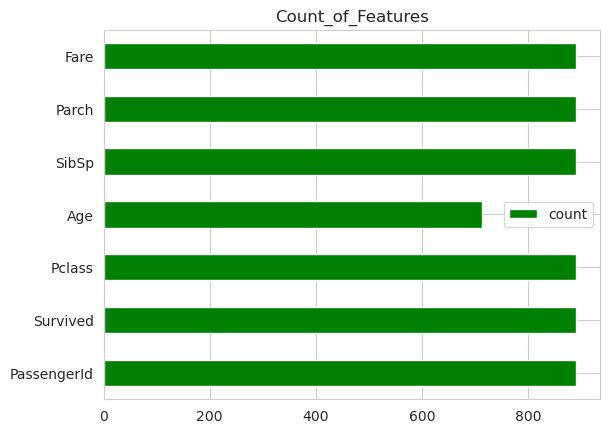

In [53]:
import matplotlib.pyplot as plt
df=A.T
df.plot(kind='barh',color='green',y='count',grid=True)
plt.title('Count_of_Features')

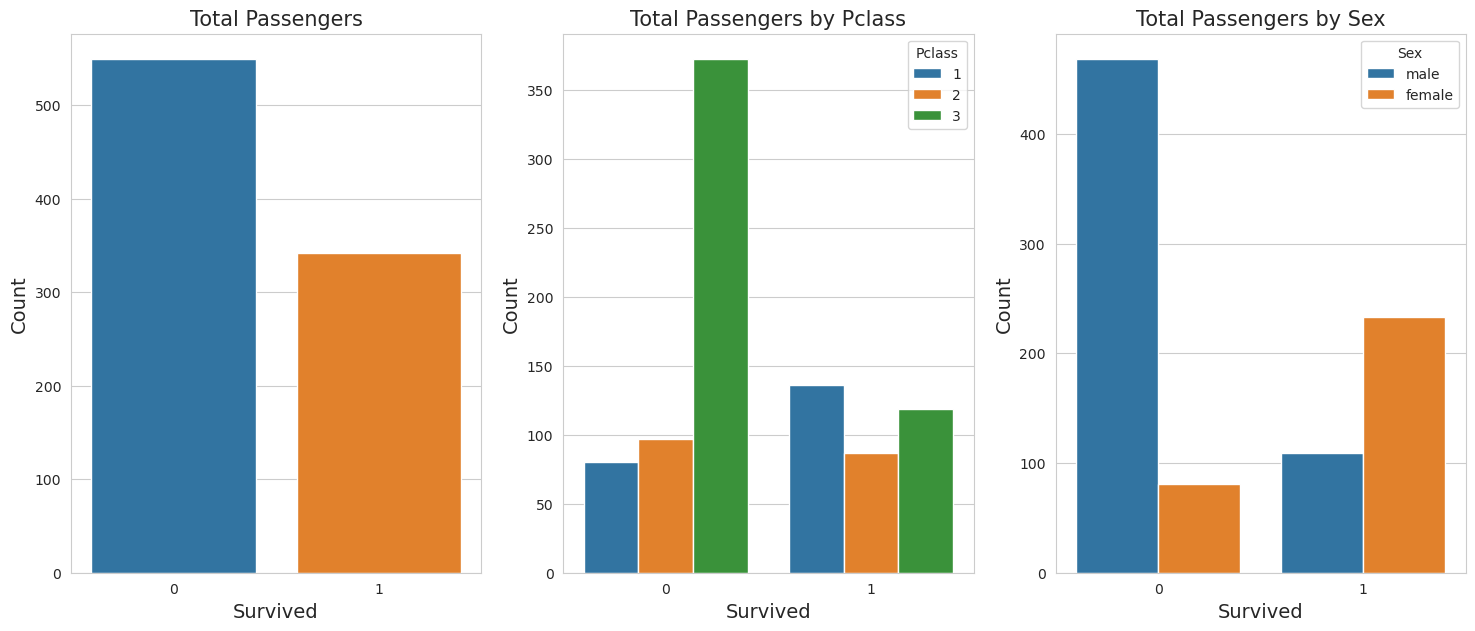

In [54]:
# General visualization of the passengers survived and not-survived according to different aspects.
import seaborn as sns
sns.set_style('whitegrid')
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(18,7))
sns.countplot(data=df1,x ='Survived', ax=ax1)
sns.countplot(data=df1,ax=ax2,x='Survived',hue='Pclass')
sns.countplot(data=df1,ax=ax3,x='Survived',hue='Sex')
ax1.set_title('Total Passengers',fontsize=15)
ax1.set_xlabel('Survived',fontsize=14)
ax1.set_ylabel('Count',fontsize=14)
ax2.set_title('Total Passengers by Pclass',fontsize=15)
ax2.set_xlabel('Survived',fontsize=14)
ax2.set_ylabel('Count',fontsize=14)
ax3.set_title('Total Passengers by Sex',fontsize=15)
ax3.set_xlabel('Survived',fontsize=14)
ax3.set_ylabel('Count',fontsize=14)
plt.show()

In [55]:
Frac_of_Pas_Sur=df1.groupby('Pclass')['Survived'].mean()
Frac_of_Pas_Sur=pd.DataFrame(Frac_of_Pas_Sur)
Frac_of_Pas_Sur

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


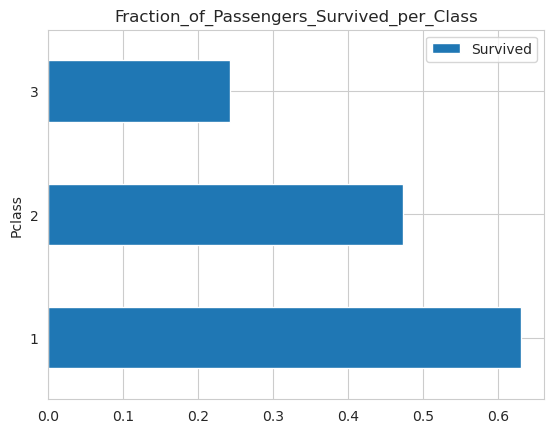

In [56]:
Frac_of_Pas_Sur.plot(kind='barh',grid=True)
plt.title('Fraction_of_Passengers_Survived_per_Class')
plt.show()

In [57]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


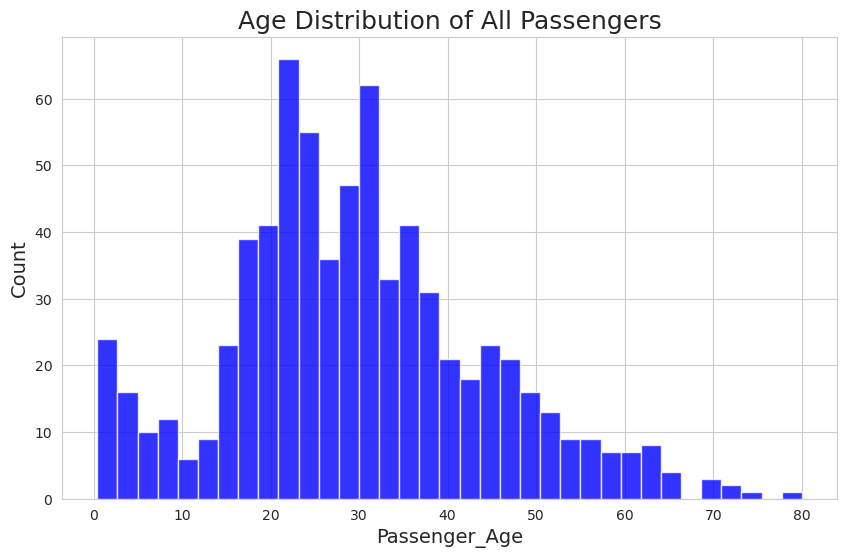

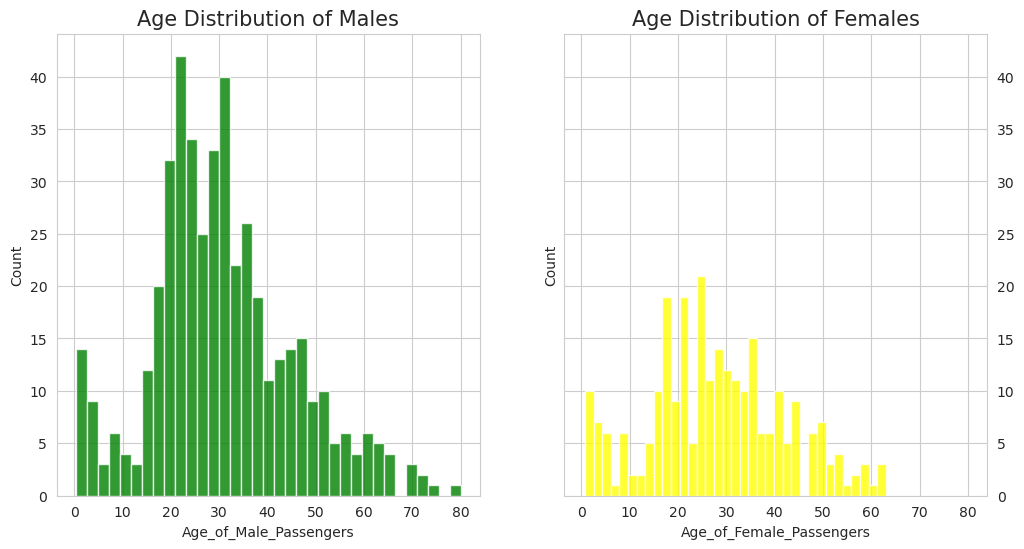

In [58]:
fig,ax00=plt.subplots(figsize=(10,6))
df1.Age.hist(bins=35,color='blue',alpha=0.8,ax=ax00)
ax00.set_xlabel('Passenger_Age',fontsize=14)
ax00.set_ylabel('Count',fontsize=14)
ax00.set_title('Age Distribution of All Passengers',fontsize=18)

fig,(ax10,ax11)=plt.subplots(ncols=2,figsize=(12,6),sharex=True,sharey=True)
df1.loc[df1["Sex"]=='male','Age'].hist(bins=35,color='green',alpha=0.8,ax=ax10)
df1.loc[df1["Sex"]=='female','Age'].hist(bins=35,color='yellow',alpha=0.8,ax=ax11)
ax10.set_title('Age Distribution of Males',fontsize=15)
ax11.set_title('Age Distribution of Females',fontsize=15)
ax10.set_xlabel('Age_of_Male_Passengers')
ax11.set_xlabel('Age_of_Female_Passengers')
ax11.set_ylabel('Count')
ax10.set_ylabel('Count')
ax11.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.show()

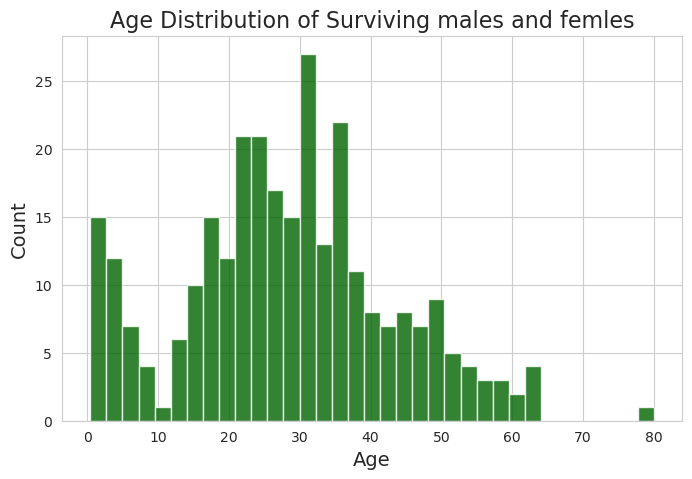

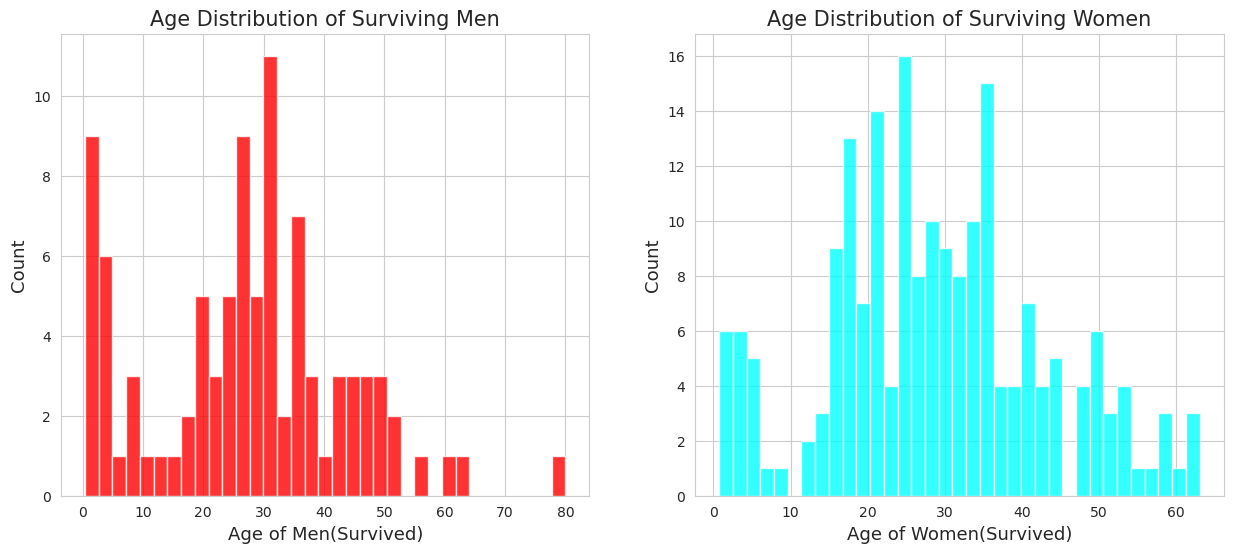

Text(0, 0.5, 'Count')

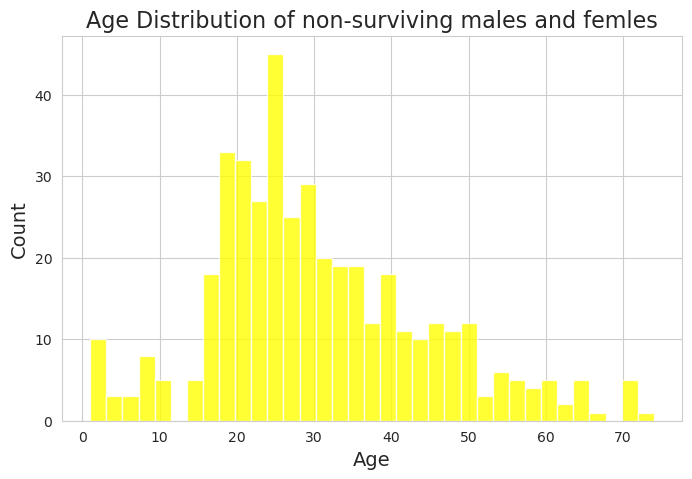

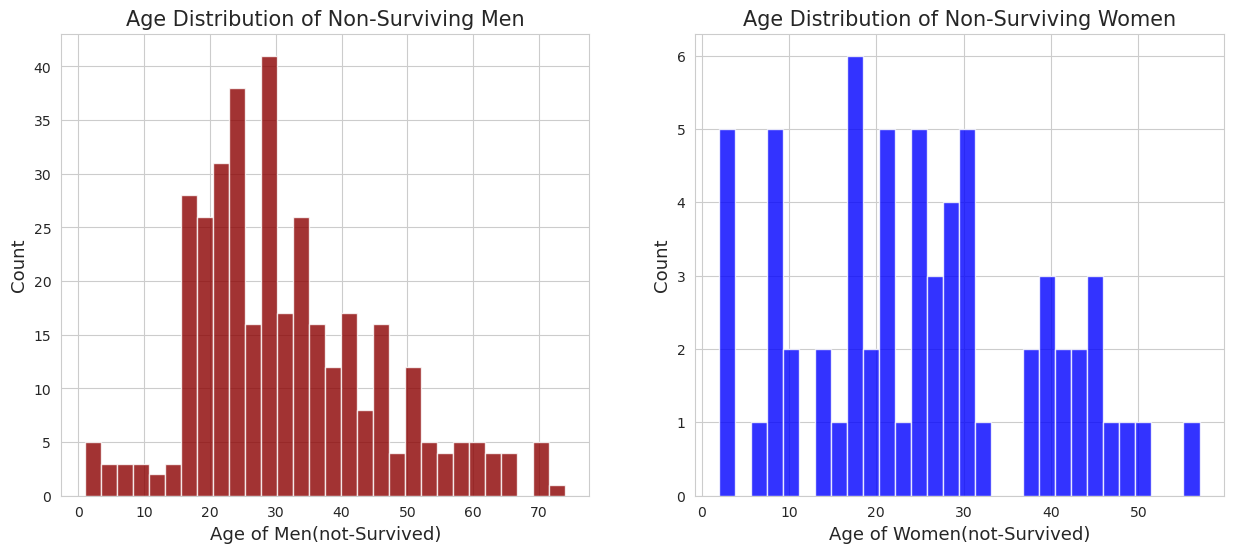

In [59]:
fig,AX=plt.subplots(figsize=(8,5))
df1.groupby(['Survived']).get_group((1))['Age'].hist(bins=35,alpha=0.8,color='darkgreen',ax=AX)
AX.set_title('Age Distribution of Surviving males and femles',fontsize=16)
AX.set_xlabel('Age',fontsize=14)
AX.set_ylabel('Count',fontsize=14)

fig,(ax21,ax22)=plt.subplots(ncols=2,figsize=(15,6))
df1.groupby(['Survived','Sex']).get_group((1,'male'))['Age'].hist(bins=35,alpha=0.8,color='red',ax=ax21)
df1.groupby(['Survived','Sex']).get_group((1,'female'))['Age'].hist(bins=35,alpha=0.8,color='cyan',ax=ax22)
ax21.set_title('Age Distribution of Surviving Men',fontsize=15)
ax21.set_xlabel("Age of Men(Survived)",fontsize=13)
ax21.set_ylabel('Count',fontsize=13)
ax22.set_xlabel("Age of Women(Survived)",fontsize=13)
ax22.set_ylabel('Count',fontsize=13)
ax22.set_title('Age Distribution of Surviving Women',fontsize=15)
plt.show()

fig,AX1=plt.subplots(figsize=(8,5))
df1.groupby(['Survived']).get_group((0))['Age'].hist(bins=35,alpha=0.8,color='yellow',ax=AX1)
AX1.set_title('Age Distribution of non-surviving males and femles',fontsize=16)
AX1.set_xlabel('Age',fontsize=14)
AX1.set_ylabel('Count',fontsize=14)

fig,(ax31,ax32)=plt.subplots(ncols=2,figsize=(15,6))
df1.loc[(df1['Survived']==0) & (df1['Sex']=='male'),'Age'].hist(bins=30,alpha=0.8,color='darkred',ax=ax31)
df1.query("Survived==0 and Sex=='female'")['Age'].hist(bins=30,alpha=0.8,color='blue',ax=ax32)
ax31.set_title('Age Distribution of Non-Surviving Men',fontsize=15)
ax31.set_xlabel("Age of Men(not-Survived)",fontsize=13)
ax31.set_ylabel('Count',fontsize=13)
ax32.set_title('Age Distribution of Non-Surviving Women',fontsize=15)
ax32.set_xlabel("Age of Women(not-Survived)",fontsize=13)
ax32.set_ylabel('Count',fontsize=13)

In [60]:
data = df1.groupby(['Sex','Pclass'])['Survived'].count()
P_data= data.reset_index().pivot(index='Pclass',columns='Sex',values='Survived')
P_data

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


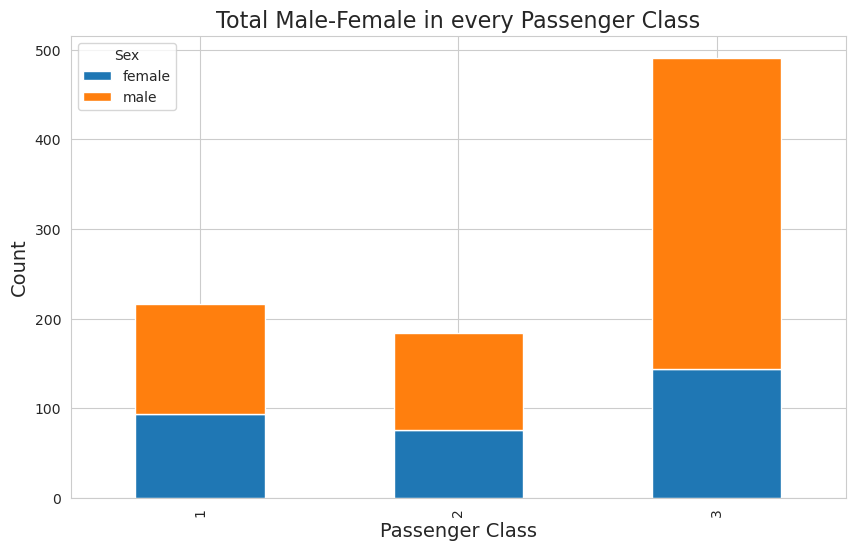

In [61]:
fig,aX1=plt.subplots(figsize=(10,6))
P_data.plot(kind='bar',stacked=True,ax=aX1)
aX1.set_title('Total Male-Female in every Passenger Class',fontsize=16)
aX1.set_xlabel('Passenger Class',fontsize=14)
aX1.set_ylabel('Count',fontsize=14)
plt.show()

In [62]:

data1=df1[df1['Survived']==1].groupby(['Sex','Pclass'])['Survived'].count().reset_index()\
.pivot(index='Pclass',columns='Sex',values='Survived')
data2=df1[df1['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().reset_index()\
.pivot(index='Pclass',columns='Sex',values='Survived')
print(data1)
print(data2)

Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47
Sex     female  male
Pclass              
1            3    77
2            6    91
3           72   300


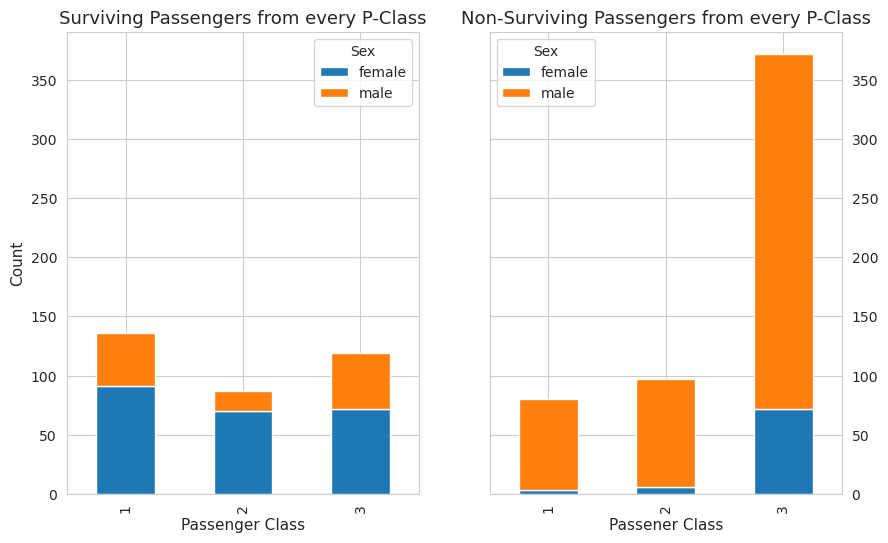

In [63]:
fig,(aX11,aX12)=plt.subplots(ncols=2, figsize=(10,6),sharex=True,sharey=True)
data1.plot(kind='bar',stacked=True,ax=aX11)
data2.plot(kind='bar',stacked=True,ax=aX12)
aX11.set_title('Surviving Passengers from every P-Class',fontsize=13)
aX11.set_xlabel('Passenger Class',fontsize=11)
aX11.set_ylabel('Count',fontsize=11)
aX12.set_title('Non-Surviving Passengers from every P-Class',fontsize=13)
aX12.set_xlabel('Passener Class',fontsize=11)
aX12.set_ylabel('Count',fontsize=11)
aX12.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.show()

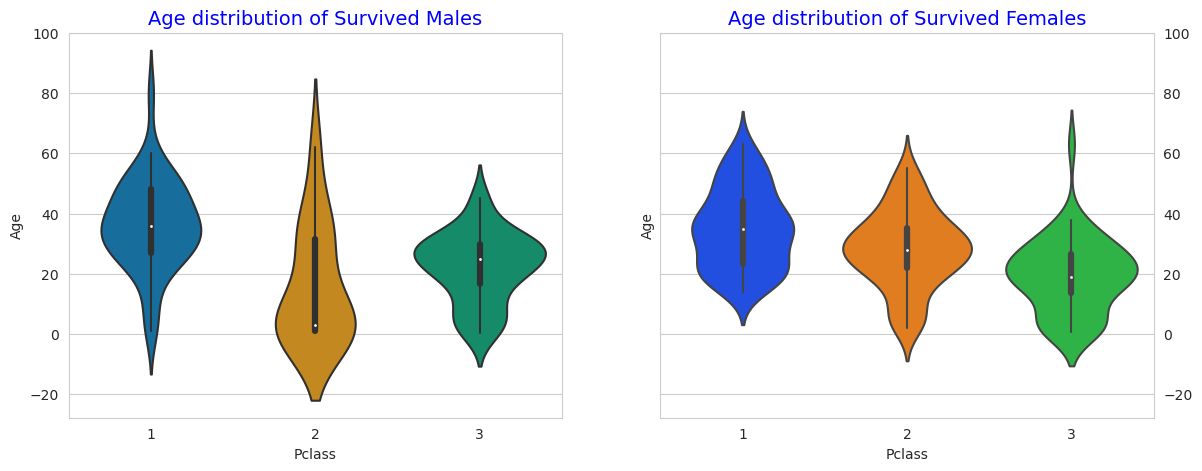

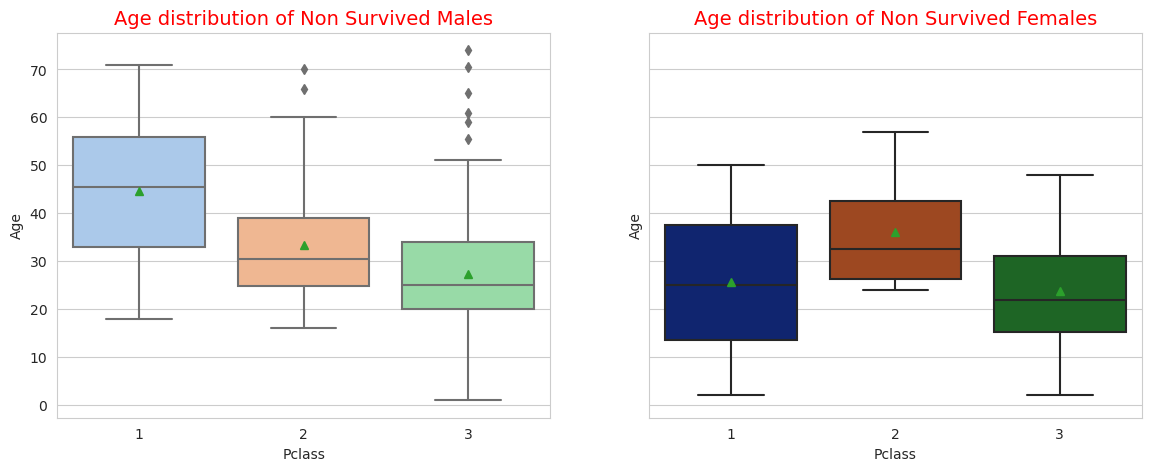

In [64]:
Male_Survived=df1.loc[(df1['Sex']=='male') & (df1['Survived']==1)]
Female_Survived=df1.loc[lambda x:(x['Sex']=='female') & (x['Survived']==1)]
fig,(AX11,AX12)=plt.subplots(ncols=2,figsize=(14,5),sharex=True,sharey=True)
sns.violinplot(data=Male_Survived,x='Pclass',y='Age',palette='colorblind',ax=AX11)
sns.violinplot(data=Female_Survived,x='Pclass',y='Age',palette='bright',ax=AX12)
AX11.set_title('Age distribution of Survived Males',fontsize=14,color='blue')
AX12.set_title('Age distribution of Survived Females',fontsize=14,color='blue')
AX12.tick_params(axis='y',which='both',labelleft=False,labelright=True)

Male_n_Survived=df1.query("Sex=='male' and Survived==0")
Female_n_Survived=df1.groupby(['Sex','Survived']).get_group(('female',0))
fig,(AX21,AX22)=plt.subplots(ncols=2,figsize=(14,5),sharex=True,sharey=True)
sns.boxplot(data=Male_n_Survived,x='Pclass',y='Age',palette='pastel',ax=AX21,showmeans=True)
sns.boxplot(data=Female_n_Survived,x='Pclass',y='Age',palette='dark',ax=AX22,showmeans=True)
AX21.set_title('Age distribution of Non Survived Males',fontsize=14,color='red')
AX22.set_title('Age distribution of Non Survived Females',fontsize=14,color='red')
AX12.tick_params(axis='y',which='both',labelleft=False,labelright=True)

Text(0.5, 1.0, 'Underaged females Survived')

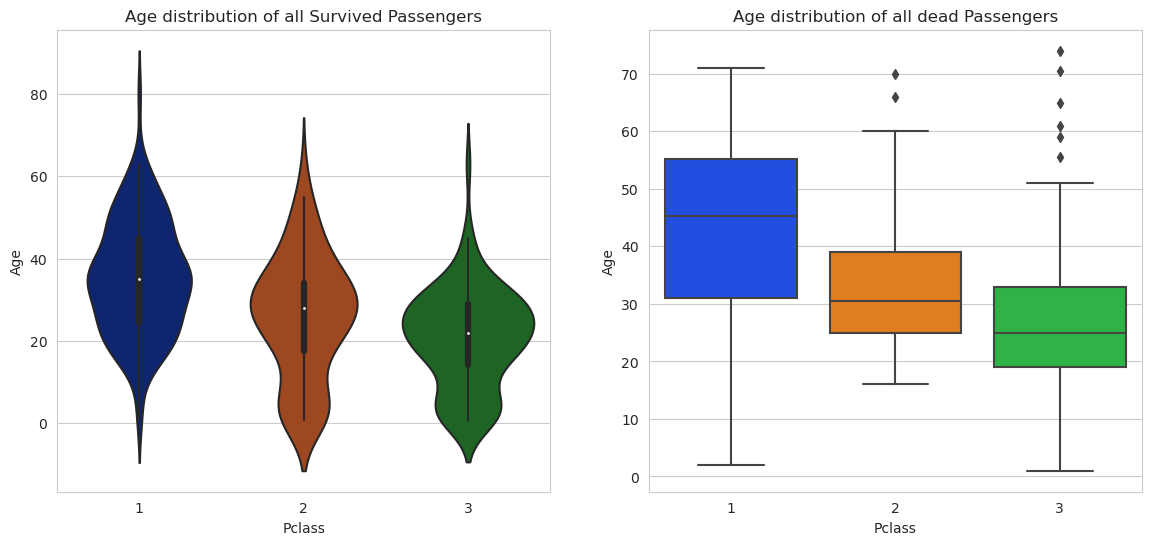

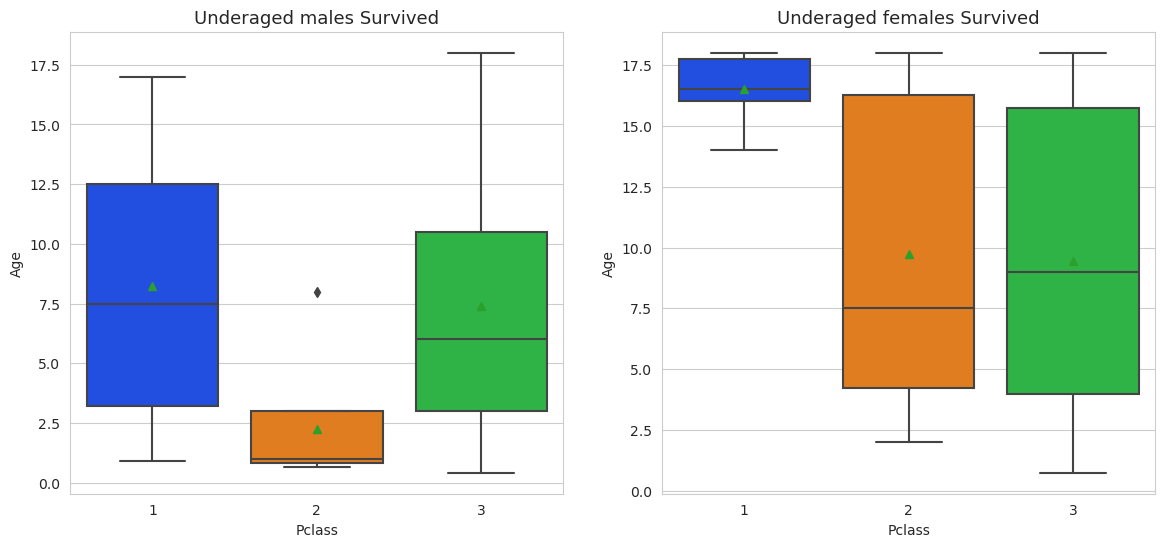

In [65]:
fig,(AA,BB)=plt.subplots(ncols=2,figsize=(14,6))
sns.violinplot(data=df1.query("Survived==1"),x='Pclass',y='Age',palette='dark',ax=AA)
sns.boxplot(data=df1.query("Survived==0"),x='Pclass',y='Age',palette='bright',ax=BB)
AA.set_title('Age distribution of all Survived Passengers')
BB.set_title('Age distribution of all dead Passengers')
M_NA=df1.groupby(['Sex','Survived',pd.cut(df1['Age'],[0,18,np.inf],labels=['<=18','>=18'])]).get_group(('male',1,'<=18'))
F_NA=df1[df1['Age']<=18].groupby(['Sex','Survived']).get_group(('female',1))
fig,(CC,DD)=plt.subplots(ncols=2,figsize=(14,6))
sns.boxplot(data=M_NA,x='Pclass',y='Age',showmeans=True,palette='bright',ax=CC)
sns.boxplot(data=F_NA,x='Pclass',y='Age',showmeans=True,palette='bright',ax=DD)
CC.set_title('Underaged males Survived',fontsize=13)
DD.set_title('Underaged females Survived',fontsize=13)

In [66]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Here we visualize that there are nan values in 'Age' column, it will be quite inaccurate if we simply replace 'nan' values with avg Age because from above observations, age of passengers varies differently from different 'Pclass' and 'Sex' groups. Lets observe this variation.**  

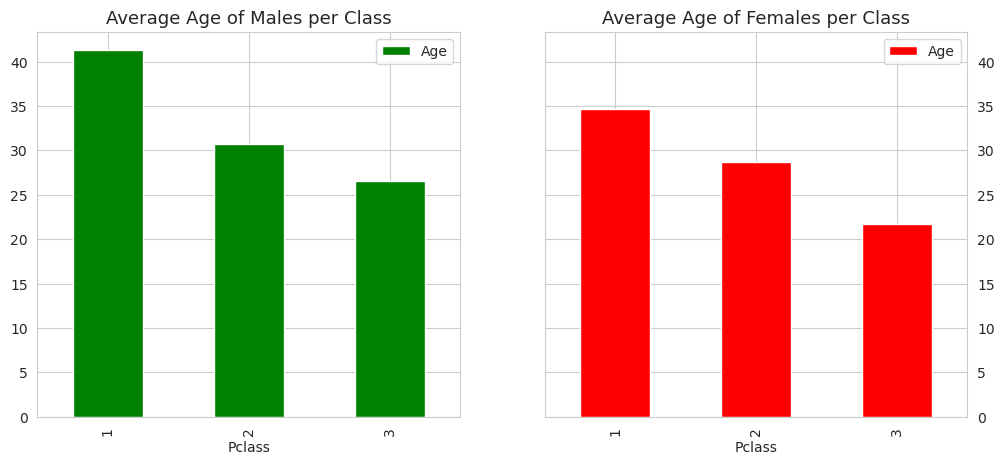

In [67]:
Male_A_Age=df1[df1['Sex']=='male'].groupby(['Pclass'])['Age'].mean()
Female_A_Age=df1[df1['Sex']=='female'].groupby(['Pclass'])['Age'].mean()
Male_A_Age=pd.DataFrame(Male_A_Age)
Female_A_Age=pd.DataFrame(Female_A_Age)
fig,(QA,QB)=plt.subplots(ncols=2,figsize=(12,5),sharey=True)
Male_A_Age.plot(kind='bar',y='Age',grid=True,color='green',ax=QA)
Female_A_Age.plot(kind='bar',y='Age',grid=True,color='red',ax=QB)
QA.set_title('Average Age of Males per Class',fontsize=13)
QB.set_title('Average Age of Females per Class',fontsize=13)
QB.tick_params(axis='y',which='both',labelleft=False,labelright=True)

In [68]:
print(Male_A_Age)
print(Female_A_Age)

              Age
Pclass           
1       41.281386
2       30.740707
3       26.507589
              Age
Pclass           
1       34.611765
2       28.722973
3       21.750000


**Now we have average age of Males and Females in each Passenger-Class(Pclass), we can replace 'nan' values of 'Age' with Average value of Age from each 'Pclass' and respective 'Sex' value.**

In [69]:
age_group=df1.groupby(['Sex','Pclass'])['Age'].mean().to_dict()
age_group
df1['Age']=df1.Age.fillna(df1.apply(lambda x:age_group.get((x['Sex'],x['Pclass'])),axis=1))
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
pre_data=df1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=False)
pre_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,21.75,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


In [71]:
sex=pd.get_dummies(pre_data['Sex'],drop_first=True)
embarked=pd.get_dummies(pre_data['Embarked'],drop_first=True)
pre_data1=pre_data.drop(columns=['Sex','Embarked'],inplace=False)
Data=pd.concat([pre_data1,sex,embarked],axis=1)
Data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00,1,0,7.2500,1,0,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,0,1
3,1,1,35.00,1,0,53.1000,0,0,1
4,0,3,35.00,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.0000,1,0,1
887,1,1,19.00,0,0,30.0000,0,0,1
888,0,3,21.75,1,2,23.4500,0,0,1
889,1,1,26.00,0,0,30.0000,1,0,0


Now when our Data is ready, lets try to predict 'Survived' in this case. 'Survived' being a categorical data, Classification algorithms like Logistic Regression may fit the data, lets check accuracy of Logistic Regression.   

In [72]:
Data.select_dtypes(include=np.number).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [73]:
X=Data.drop(columns=['Survived'],axis=1)
Y=Data['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train[['Age','Fare']]=Scaler.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']]=Scaler.transform(X_test[['Age','Fare']])

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
Regressor=LogisticRegression(random_state=13)
Regressor.fit(X_train,Y_train)
Y_pred=Regressor.predict(X_test)
Y_pred_proba_LR=Regressor.predict_proba(X_test)
CM=confusion_matrix(Y_test,Y_pred)
print(CM)
print(f'Accuracy Score is : {accuracy_score(Y_test,Y_pred)}')

[[92 13]
 [19 55]]
Accuracy Score is : 0.8212290502793296


Lets use another Classification Algorithm --> Decision-Tree and compare the accuracy result with 
Logistic- Regression.

In [75]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,Y_train)
Y1_pred=tree.predict(X_test)
Y1_pred_proba_DT = tree.predict_proba(X_test)
from sklearn.metrics import accuracy_score
print(f'Accuracy Score is : {accuracy_score(Y_test,Y1_pred)}')
confusion_matrix(Y_test,Y1_pred)

Accuracy Score is : 0.8100558659217877


array([[88, 17],
       [17, 57]])

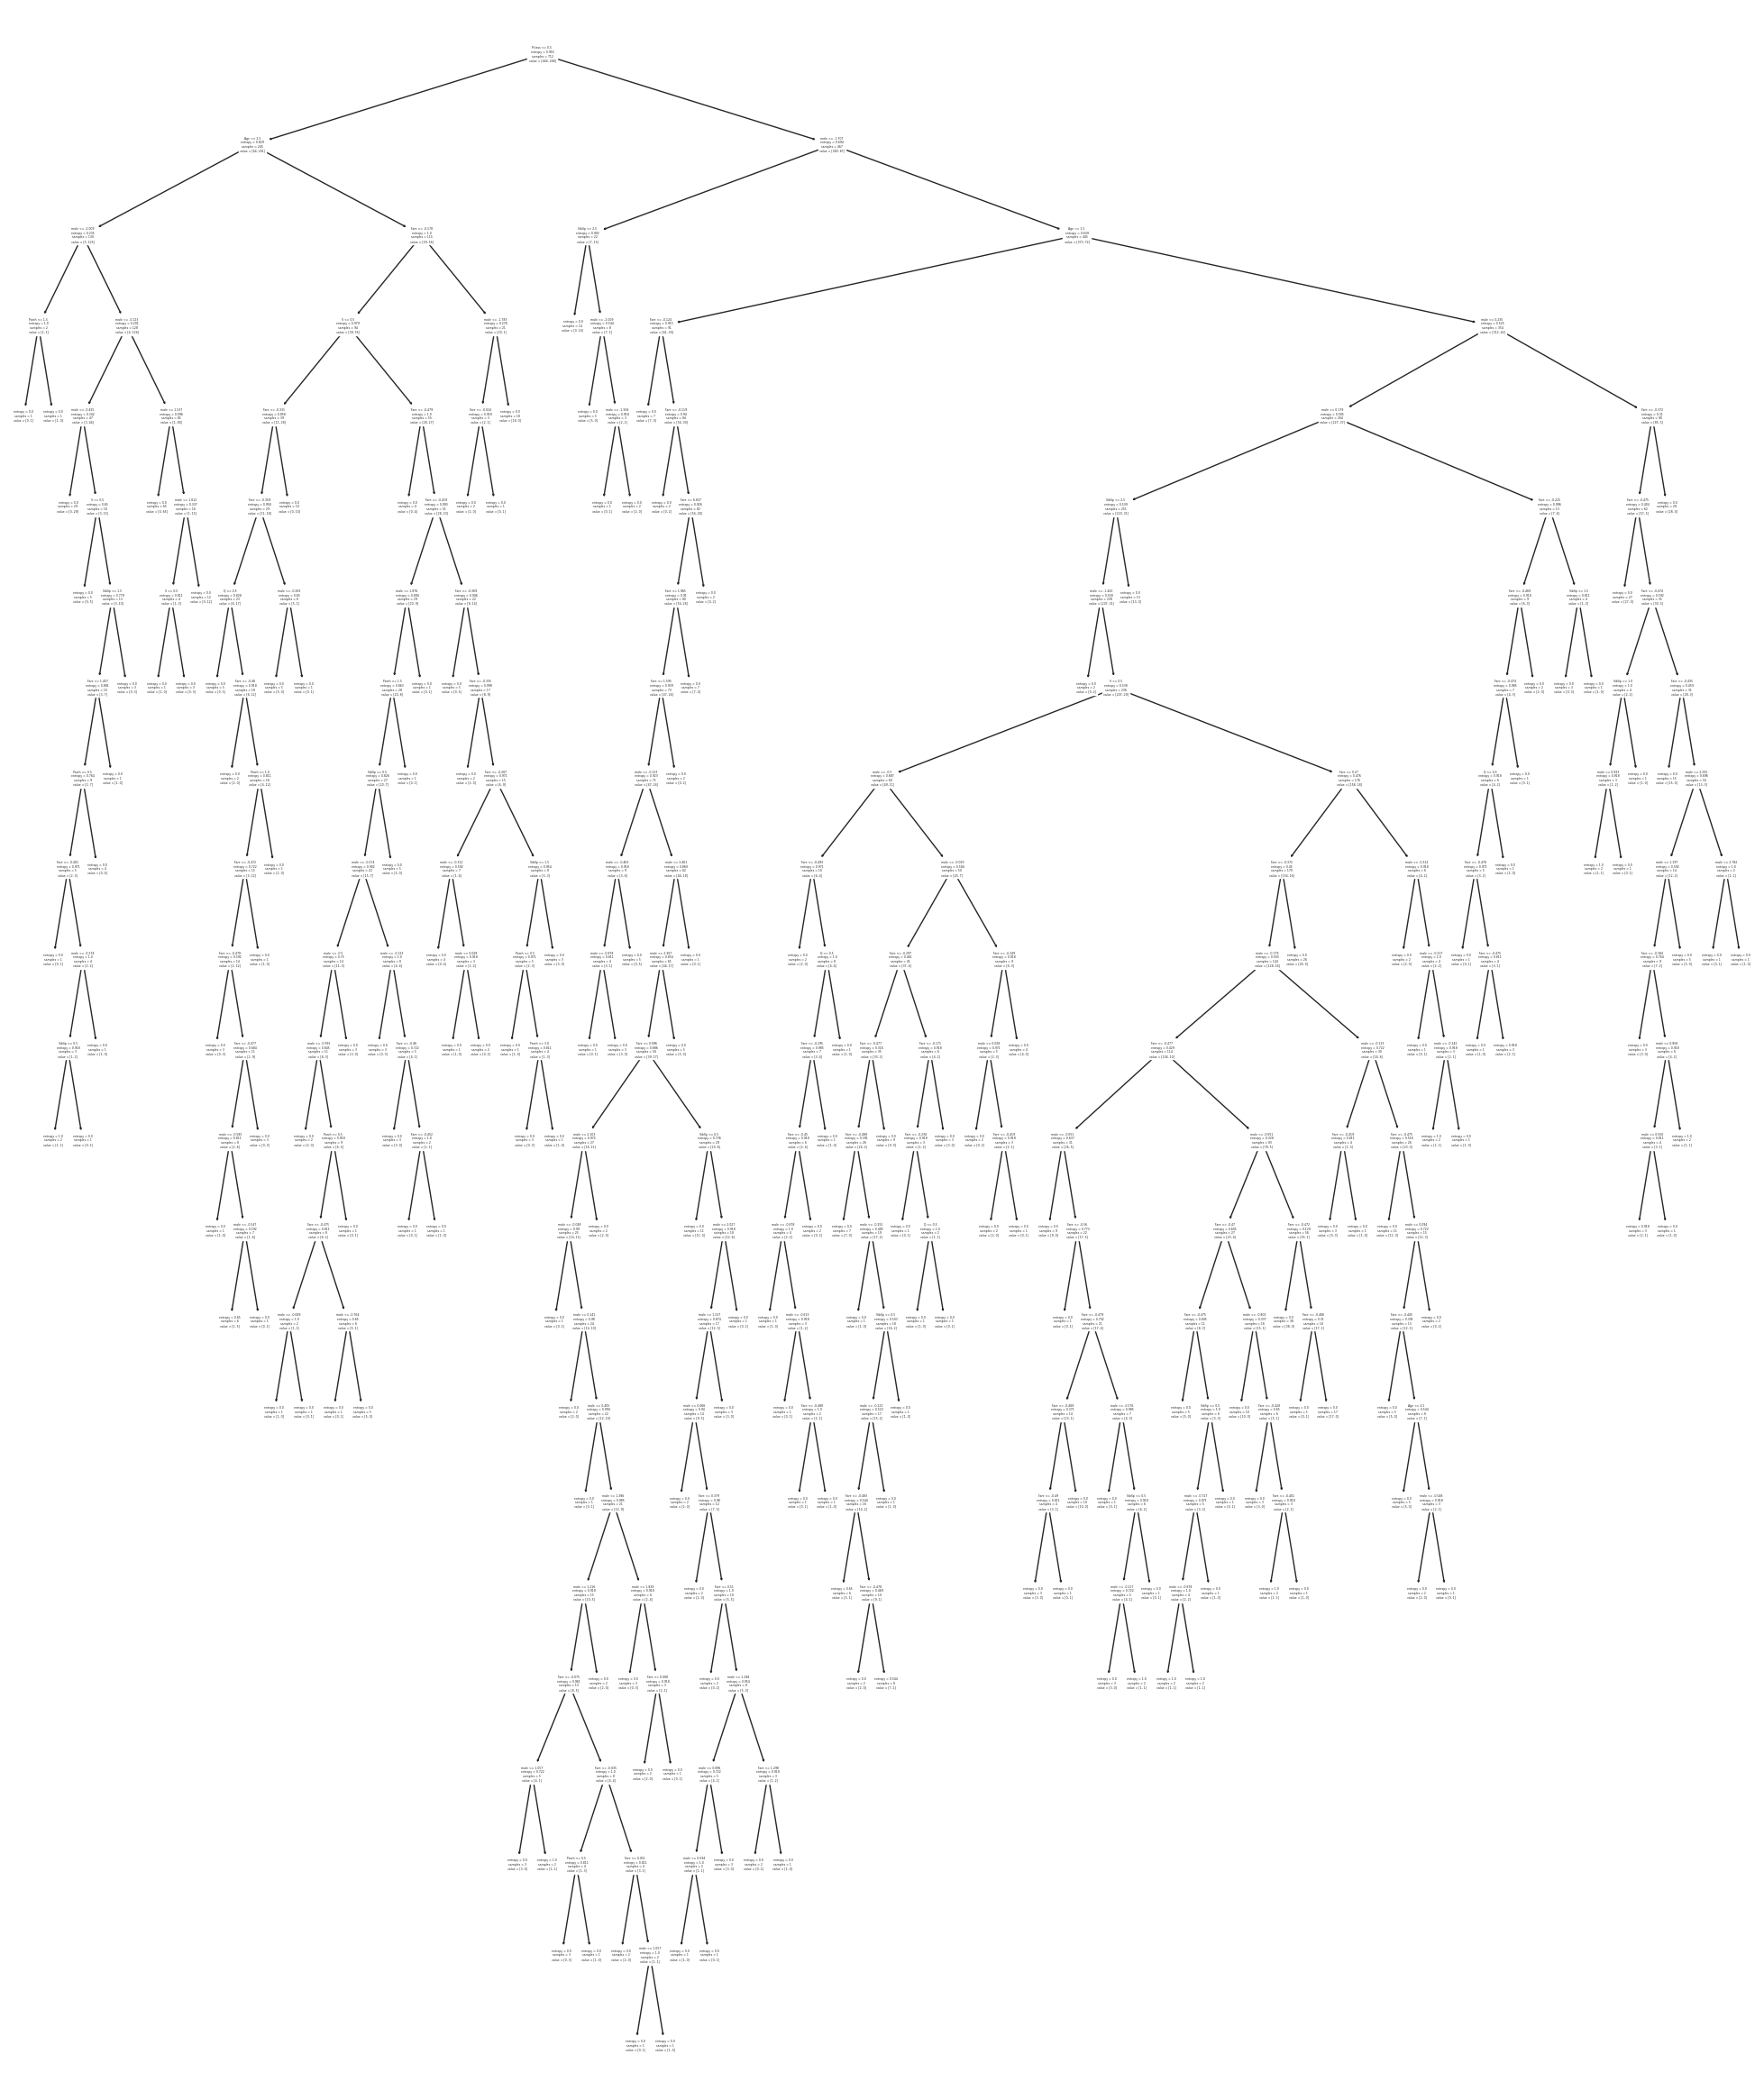

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,30))
plot_tree(tree,feature_names=['Age','male','SibSp','Parch','Fare','Pclass','Q','S'])
plt.show()

In [77]:
tree.get_depth()

22

In [78]:
tree.get_n_leaves()

175

We can use Hyperparameter tuning to improve the accuracy of the model, lets try K-fold Cross Validation.
**default cv value is 5, means 5 fold cross validation**

In [79]:
param={'criterion' : ["entropy","gini"],
      'max_depth' : range(4,15),
      'splitter' : ["best","random"]}
from sklearn.model_selection import RandomizedSearchCV
RandomCV=RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                           param_distributions=param,
                           n_iter=15,
                           random_state=42,
                           cv=55)
RandomCV.fit(X_train,Y_train)

RandomizedSearchCV(cv=55, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(4, 15),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [80]:
best_estimator=RandomCV.best_estimator_
print(best_estimator)
Y1_pred_Rcv=RandomCV.predict(X_test)
Y1_pred_Rcv_proba = RandomCV.predict_proba(X_test)
confusion_matrix(Y_test,Y1_pred_Rcv)
print(f'Accuracy score by K-Fold CV is: {accuracy_score(Y_test,Y1_pred_Rcv)}')

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')
Accuracy score by K-Fold CV is: 0.7932960893854749


In [81]:
print('Accuracy Score in Logistic Regression : 0.84916')
print('Accuracy Score in Decision Tree is : 0.79888')
print(f'Accuracy Score in Decision Tree by K-Fold CV is : {accuracy_score(Y_test,Y1_pred_Rcv)}')

Accuracy Score in Logistic Regression : 0.84916
Accuracy Score in Decision Tree is : 0.79888
Accuracy Score in Decision Tree by K-Fold CV is : 0.7932960893854749


Use RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=43,n_estimators=85,max_depth=9,criterion='entropy',) #max_depth value from best_parameters above.
rf.fit(X_train,Y_train)
Y1_pred_Rf=rf.predict(X_test)
Y1_pred_RF_proba = rf.predict_proba(X_test)
accuracy_score(Y_test,Y1_pred_Rf)

0.8212290502793296

Using KNN

In [83]:
X_train.shape[0]**(1/2)

26.68332812825267

In [84]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=27)
KNN.fit(X_train,Y_train)
Y_P_KNN = KNN.predict(X_test)
Y_P_KNN_proba = KNN.predict_proba(X_test)
print(f'Accuracy Score is : {accuracy_score(Y_test,Y_P_KNN)}')
confusion_matrix(Y_test,Y_P_KNN)

Accuracy Score is : 0.7988826815642458


array([[92, 13],
       [23, 51]])

GridSearch on the top of KNN

In [85]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = { 'n_neighbors': [i for i in range(3,28)],
              'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan','minkowski']
}
GS = GridSearchCV(KNeighborsClassifier(),
                 param_grid = param_grid,
                 cv=5,
                 verbose = 1)
GS.fit(X_train,Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [86]:
Best_param = GS.best_params_
print(Best_param)
Best_knn = GS.best_estimator_
print(Best_knn)
Y_P_KNN_GS = Best_knn.predict(X_test)
Y_P_KNN_GS_proba = Best_knn.predict_proba(X_test)
print(f'Accuracy Score is : {accuracy_score(Y_test,Y_P_KNN_GS)}')
print(confusion_matrix(Y_test,Y_P_KNN_GS))

{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=18)
Accuracy Score is : 0.8212290502793296
[[95 10]
 [22 52]]


RandomizedSearch on the top of KNN

In [87]:
param_rand = {'n_neighbors': [i for i in range(3,28)],
             'weights': ['uniform','distance'],
             'metric':['euclidean','manhattan','minkowski']
}
Rand_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                             param_distributions= param_rand,
                             n_iter=107,
                             cv=7,
                             verbose=1,
                             return_train_score=True,random_state=42)
Rand_knn.fit(X_train,Y_train)

Fitting 7 folds for each of 107 candidates, totalling 749 fits


RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(), n_iter=107,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19, 20, 21, 22,
                                                        23, 24, 25, 26, 27],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True, verbose=1)

In [88]:
Best_p = Rand_knn.best_params_
print(Best_p)
Best_KNN_RSCV = Rand_knn.best_estimator_
print(Best_KNN_RSCV)
Y_P_KNN_RSCV = Best_KNN_RSCV.predict(X_test)
Y_P_KNN_RSCV_proba = Best_KNN_RSCV.predict_proba(X_test)
print(f'Accuracy Score is : {accuracy_score(Y_test,Y_P_KNN_RSCV)}')
confusion_matrix(Y_test,Y_P_KNN_RSCV)

{'weights': 'uniform', 'n_neighbors': 16, 'metric': 'manhattan'}
KNeighborsClassifier(metric='manhattan', n_neighbors=16)
Accuracy Score is : 0.8156424581005587


array([[94, 11],
       [22, 52]])

In [89]:
print(f'Accuracy Score in Logistic Regression : {accuracy_score(Y_test,Y_pred)}')
print(f'Accuracy Score in Decision Tree is : {accuracy_score(Y_test,Y1_pred)}')
print(f'Accuracy Score in Decision Tree by K-Fold CV is : {accuracy_score(Y_test,Y1_pred_Rcv)}')
print(f'Accuracy Score in Random Forest : {accuracy_score(Y_test,Y1_pred_Rf)}')
print(f'Accuracy Score in KNN : {accuracy_score(Y_test,Y_P_KNN)}')
print(f'Accuracy Score in KNN by GridSearchCV : {accuracy_score(Y_test,Y_P_KNN_GS)}')
print(f'Accuracy Score in KNN by RandomizedSearchCV : {accuracy_score(Y_test,Y_P_KNN_RSCV)}')

Accuracy Score in Logistic Regression : 0.8212290502793296
Accuracy Score in Decision Tree is : 0.8100558659217877
Accuracy Score in Decision Tree by K-Fold CV is : 0.7932960893854749
Accuracy Score in Random Forest : 0.8212290502793296
Accuracy Score in KNN : 0.7988826815642458
Accuracy Score in KNN by GridSearchCV : 0.8212290502793296
Accuracy Score in KNN by RandomizedSearchCV : 0.8156424581005587


**Lets print the ROC and AUC curve for each Model**

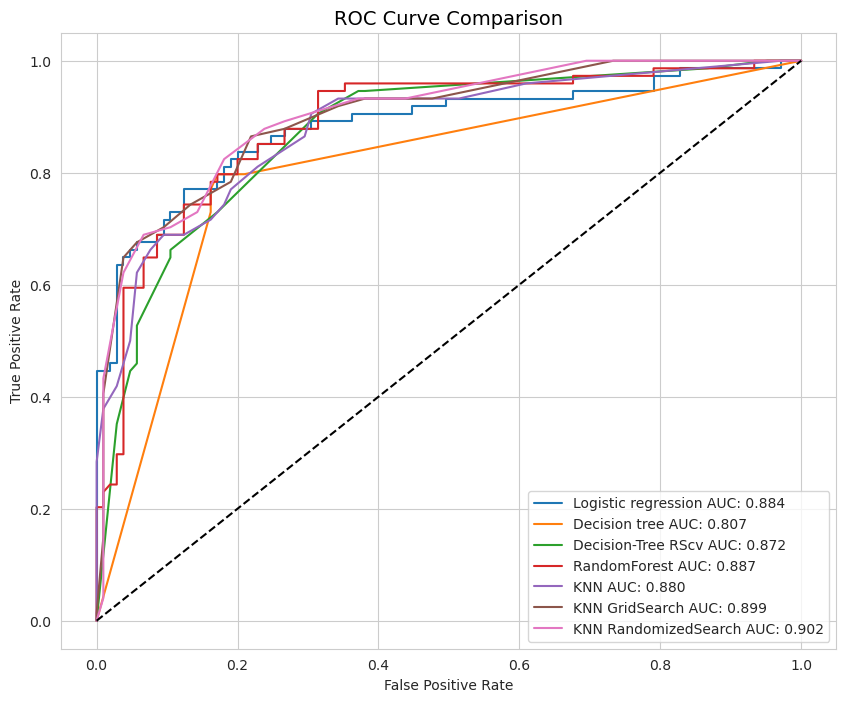

In [90]:
fpr_lr,tpr_lr,_ = roc_curve(Y_test,Y_pred_proba_LR[:,1])  # Logistic Regression
auc_lr = auc(fpr_lr,tpr_lr)

fpr_dt,tpr_dt,_ = roc_curve(Y_test,Y1_pred_proba_DT[:,1])   # Decision Tree Classifier
auc_dt = auc(fpr_dt,tpr_dt)

fpr_dt_RS,tpr_dt_RS,_ = roc_curve(Y_test,Y1_pred_Rcv_proba[:,1])   # Decision Tree + RandomizedSearchCV
auc_dt_rs = auc(fpr_dt_RS,tpr_dt_RS)

fpr_rf,tpr_rf,_ = roc_curve(Y_test,Y1_pred_RF_proba[:,1])   # Random Forest
auc_rf = auc(fpr_rf,tpr_rf)

fpr_knn,tpr_knn,_ = roc_curve(Y_test,Y_P_KNN_proba[:,1])   # KNN
auc_knn = auc(fpr_knn,tpr_knn)

fpr_knn_gs,tpr_knn_gs,_ = roc_curve(Y_test,Y_P_KNN_GS_proba[:,1])    # KNN + GridSearchCV
auc_knn_gs = auc(fpr_knn_gs,tpr_knn_gs)

fpr_knn_rs,tpr_knn_rs,_ = roc_curve(Y_test,Y_P_KNN_RSCV_proba[:,1])   # KNN + RandomizedSearchCV
auc_knn_rs = auc(fpr_knn_rs,tpr_knn_rs)

plt.figure(figsize=(10,8))
plt.plot(fpr_lr,tpr_lr,label=f'Logistic regression AUC: {auc_lr:.3f}')
plt.plot(fpr_dt,tpr_dt,label=f'Decision tree AUC: {auc_dt:.3f}')
plt.plot(fpr_dt_RS,tpr_dt_RS,label=f'Decision-Tree RScv AUC: {auc_dt_rs:.3f}')
plt.plot(fpr_rf,tpr_rf,label=f'RandomForest AUC: {auc_rf:.3f}')
plt.plot(fpr_knn,tpr_knn,label=f'KNN AUC: {auc_knn:.3f}')
plt.plot(fpr_knn_gs,tpr_knn_gs,label=f'KNN GridSearch AUC: {auc_knn_gs:.3f}')
plt.plot(fpr_knn_rs,tpr_knn_rs,label=f'KNN RandomizedSearch AUC: {auc_knn_rs:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison',size=14,color='black')
plt.legend(loc='best')
plt.show()